## **Oficina: Visão Computacional**

## Parte 1: Comandos básicos

# importando os pacotes necessários para o treinamento
import cv2 as cv 
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# Listar pastas usando os comandos mágicos do jupyter
%ls

In [ ]:
# Listando usando o python 

# O pacote os nos permite usar comandos básicos do sitema operacional. 
pasta = os.listdir('../') # retorna uma lista com os arquivos presentes no diretório passado

# Printando os arquivos presentes na pasta
for num, arquivo in enumerate(pasta):
    print(f"Arquivo {num}: {arquivo}")

In [ ]:
# Verificando o contéudo da nossa pasta assets
if not os.listdir('../assets/'): # verifica se a pasta está vazia
    print("Pasta vazia!")
else:
    print(os.listdir('../assets/'))

## Imagem digital

**Uma imagem digital é geralmente representada em termos de duas dimensões:** largura e altura. Isso é comumente referido como uma imagem 2D. Cada pixel na imagem é identificado por sua posição nessas duas dimensões.

No entanto, a representação de cores em uma imagem adiciona uma terceira dimensão, que é a dimensão da cor. Isso resulta em uma imagem colorida, onde cada pixel possui informações de cor. A dimensão de cor pode ser representada de diferentes maneiras, sendo as mais comuns:

**Imagem em Escala de Cinza (Monocromática):** Nesse caso, cada pixel possui apenas um valor que representa a intensidade de brilho, variando de preto (0) a branco (255). A imagem é, portanto, uma matriz 2D de valores de intensidade.

**$$f(x,y) = (L_{1})$$**

$L_{min}$ e $L_{max}$: Variando de 0 até 255 - (8 bits na banda)

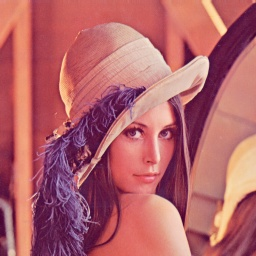

**Imagem Colorida:** Para imagens coloridas, cada pixel possui três valores de cor: vermelho (R), verde (G) e azul (B), ou seja, cada pixel é uma combinação dessas três cores primárias. Essa representação é comum e é chamada de espaço de cores RGB. Cada canal de cor representa uma dimensão adicional na imagem.

**Portanto, para uma imagem colorida, você teria três dimensões:** largura, altura e canais de cor (geralmente vermelho, verde e azul), tornando-a uma imagem 3D. Em termos de matrizes, isso seria representado como uma matriz 3D, onde cada elemento da matriz contém um vetor de três valores de cor

**$$f(x,y) = (L_{1}, L_{2}, L_{3})$$**

$L_{min}$ e $L_{max}$: Variando de 0 até 255 - 3x(8 bits por banda)


<img src="../assets/rgbExample.png" width="600">

### Espaço de Cores RGB

O espaço de cores RGB é um modelo de cores que é amplamente utilizado na representação de imagens digitais. Ele é baseado na combinação de três cores primárias: vermelho, verde e azul. Cada pixel em uma imagem RGB é representado por três valores numéricos que indicam a intensidade de cada uma dessas cores. Esses valores variam de 0 a 255, o que significa que existem 256 níveis de intensidade para cada cor. Ao combinar essas três cores primárias em diferentes proporções, podemos criar uma ampla variedade de cores.

<img src="../assets/RGB_color_solid_cube.png" width="300">

O espaço de cores RGB é usado em muitos dispositivos eletrônicos, como monitores de computador, câmeras digitais e scanners. Ele também é usado em muitos softwares de edição de imagem, como o Adobe Photoshop e o GIMP.


## Criando nossa primeira "própria" imagem digital 

In [ ]:
# Definindo a largura e a altura
x = 640
y = 480

#Criando um a matriz de zeros
imgGray = np.zeros((y,x))
imgGray


In [ ]:
# Imprimindo o tipo
print("O tipo do meu objeto é: ", type(imgGray),"\n")

In [ ]:
# Dimensões
imgGray.shape

In [ ]:
# Acessando pelo index as dimensões
largura = imgGray.shape[0] # x (quantidade de colunas)
altura = imgGray.shape[1]  # y (quantidade de linhas)

In [ ]:
# Verificando...
print("As dimensões da minha imagem matriz são:")
print("Largura =", largura)
print("Altura =", altura)

In [ ]:
# Salvando nossa imagem
cv2.imwrite('../assets/imgZeros.png', imgGray)

In [ ]:
# Tipo dos elementos da nossa matriz
imgGray.dtype

In [ ]:
# Dando novamente uma olhada na estrutura da matrix
imgGray

In [ ]:
# Convertendo o tipo para inteiros de 0 à 255 (8 bits ou 1 byte)
imgGray = imgGray.astype(np.uint8)
imgGray.dtype

In [ ]:
# Verificando...
imgGray

In [ ]:
# Exibindo nossa imagem usando o OpenCV
cv2.imshow("Minha primeira imagem digital", imgGray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:

for linha in range(imgGray.shape[0]):
    for coluna in range(imgGray.shape[1]):
        if linha <= 320:
            imgGray[linha][coluna] = 255
        else:
            imgGray[linha][coluna] = 0
cv2.imwrite('../assets/imgGray.png', imgGray)

In [ ]:
if not os.listdir('../assets/'): # verifica se a pasta está vazia
    print("Pasta vazia!")
else:
    print(os.listdir('../assets/'))

In [ ]:
# Abrindo imagem

# Lê a imagem
img = cv2.imread("../assets/imgGray.png") 

# Mostra a imagem
cv2.imshow("Imagem preta e branca", img)

# Espera o usuário digitar qualquer tecla
key = cv2.waitKey(0) 

# Fecha a janela após o comando anterior
cv2.destroyAllWindows()  

In [ ]:
# Baixando uma imagem RGB
comando = "wget -nv -O ../assets/lena.png https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
os.system(comando)

**Atividade 1:** Usando os comandos anteriores obtenha a largura e o comprimento da imagem baixada. Lembre-se que o arquivo baixado está na pasta ../assets. 

In [ ]:
# Escreva seu código aqui:

## Carregando videos no OpenCV

In [ ]:
# Abrindo um video

# Cria um objeto videoCapture
video = cv2.VideoCapture("../assets/ballVideo.mp4")


while True:
    
    
    ret, frame = video.read()
    
    if not ret:
        break
    cv2.imshow('Video', frame)

    # Pressione 'q' para sair do loop
    
    # 0111 0001
    #     and
    # 1111 1111
    # 0111 0001 se é igual a 0111 0001 
    # Aplicando a máscara é garantido que peguemos apenos os 8 bits menos significativos
    
    if cv2.waitKey(33) & 0xFF == ord('q'):
        break

# Libera os recursos
video.release()
cv2.destroyAllWindows()
    

In [ ]:
# redimensionando uma imagem
largura = 640
altura = 480

lena = cv2.imread("../assets/lena.png")
img = cv2.resize(lena, (largura, altura))
cv2.imshow("Lena", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<!-- Acho que esse pedaço pode vir junto com Espaço de Cores RGB -->

## Compreendendo os canais de cores 

<!-- <img src="../assets/lena.jpg"> --> 
<!-- Achei melhor usar da UnBeatables -->

<img src="../assets/unbeatables_logo.png" width = 300>


Sabendo o que é uma imagem colorida, imagine-a como um quebra-cabeça composto por três partes fundamentais: os canais de cores RGB. Ao separar os canais, é possível perceber como cada um contribui para a aparência da imagem. O canal vermelho enfatiza as áreas da imagem com vermelho predominante, o canal verde destaca os verdes e o canal azul realça os azuis.

Sabendo que cada canal contribui com sua intensidade e matiz específicas, ao combinar novamente os canais RGB, forma-se a imagem colorida original. 

Entender como esses canais funcionam é muito importante para edição e processamento de imagens em diversos contextos.

In [3]:
# Esse codigo e para dividir uma imagem colorida em seus 3 canais (B, G e R) de forma individual
# E para compreender os diferentes canais de cores e como eles contribuem para a composição da imagem colorida final

import cv2

# Carregar a imagem colorida
# image_color = cv2.imread('../assets/lena.jpg')
image_color = cv2.imread('../assets/unbeatables_logo.png')      # Com a logo da UnBeatables ficou melhor de visualizar

# Criar imagem em 3 canais de cores (BGR)
image_blue = image_color[:, :, 0]         # Seleciona todas as linhas, todas as colunas e o canal desejado da matriz
image_green = image_color[:, :, 1]
image_red = image_color[:, :, 2]

# Salvar as imagens no espaço B, G e R
# Lena
# cv2.imwrite('../assets/lena_blue.jpg', image_blue)
# cv2.imwrite('../assets/lena_green.jpg', image_green)
# cv2.imwrite('../assets/lena_red.jpg', image_red)

# UnBeatables
cv2.imwrite('../assets/unbeatables_blue.jpg', image_blue)
cv2.imwrite('../assets/unbeatables_green.jpg', image_green)
cv2.imwrite('../assets/unbeatables_red.jpg', image_red)

# Visualizar as imagens no espaço B, G e R
# Lena
# cv2.imshow('../assets/lena_blue.jpg', image_blue)
# cv2.imshow('../assets/lena_green.jpg', image_green)
# cv2.imshow('../assets/lena_red.jpg', image_red)

# # UnBeatables
cv2.imshow('../assets/unbeatables_blue.jpg', image_blue)
cv2.imshow('../assets/unbeatables_green.jpg', image_green)
cv2.imshow('../assets/unbeatables_red.jpg', image_red)

# Resultado da combinaçao dos canais de cores individuais em uma unica imagem colorida
image_merged = cv2.merge((image_blue, image_green, image_red))

# Lena
# cv2.imwrite('../assets/lena_merged.jpg', image_merged)
# cv2.imshow('../assets/lena_merged.jpg', image_merged)

# UnBeatables
cv2.imwrite('../assets/unbeatables_merged.jpg', image_merged)
cv2.imshow('../assets/unbeatables_merged.jpg', image_merged)

cv2.waitKey(0)
cv2.destroyAllWindows()

## **Parte 3: Filtros e Remoção Ruído** <Fernanda>

As aplicações de filtros e remoção de ruídos em processamento de imagens são técnicas fundamentais para melhorar a qualidade das imagens, realçar características importantes e tornar a análise de imagens mais precisas. 

Para aprender o que é um filtro, é essencial primeiro entender como é sua implementação. Para isso, é preciso compreender o conceito de **convolução em imagens**.

A convolução é uma operação básica no processamento de imagens, utilizada para aplicar filtros em uma imagem. Um filtro, muitas vezes chamado de "kernel", é uma matriz pequena que é deslizada sobre a imagem original, multiplicando os valores dos pixels da imagem pelos valores correspondentes do filtro e somando o resultado. Esse valor resultante é atribuído a um novo pixel na imagem de saída. A convolução ajuda a realçar características específicas da imagem, como bordas, texturas, entre outros.

**Exemplo**:

<img src="../assets/Convolucao_Imagens.png" width="400">

Nesse exemplo é possível ver uma limitação da convolução que é o tratamento das bordas da imagem. A limitação no tratamento das bordas ocorre porque, para calcular os elementos do output, é necessário que o kernel se sobreponha completamente à imagem. Nas extremidades da imagem, onde o kernel não pode se sobrepor completamente, a convolução não é calculada. Isso resulta em uma saída menor do que a imagem original, deixando de considerar as bordas da imagem.

Geralmente as funções de processamento de imagem, conseguem lidar com essa limitação e gerar um output do mesmo tamanho do input. Nesse exemplo, técnicas como preenchimento de borda (padding) podem ser usadas para estender a imagem, permitindo que o kernel se sobreponha completamente, resultando em um output do mesmo tamanho que a imagem original. O preenchimento pode ser feito replicando os valores das bordas da imagem ou usando outros métodos adequados.

Visto a teoria, vamos para a prática dos filtros de suavização. O primeiro filtro que iremos aplicar é o filtro **blur**, que é uma das formas de retirar ruídos de uma imagem. Em resumo, o filtro blur, utilizando um kernel, realiza uma média aritmética dos valores dos pixels na vizinhança, onde cada pixel contribui igualmente para o cálculo da média. É uma média simples dos valores dos pixels vizinhos.

Outro tipo de filtro de suavização que vamos aplicar é o **GaussianBlur**, que se difere do blur por causa do kernel. Em reusmo, o Gaussian Blur, utilizando um kernel gaussiano (onde os pesos dos pixels seguem uma função gaussiana), aplica uma média ponderada dos pixels vizinhos, onde os pixels mais próximos ao centro do kernel têm uma contribuição maior, criando o efeito de suavização na imagem.

- Link para auxiliar no uso das funções do OpenCV: https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html

- Link para visualizar kernel dos filtros de suavização: https://www.opencv-srf.com/2018/01/filter-images-and-videos.html

In [37]:
# blur.py
import cv2

image = cv2.imread("../assets/lena_noisy.jpeg")

# Filtro Blur
# image_blur1 = cv2.blur(image, (3,3))      # Recebe como argumento a imagem e o tamanho de kernel e retorna a imagem borrada

# Que diferença faz o tamanho do kernel?
image_blur = cv2.blur(image, (7,7))     # Vantagens e desvantagens: Reduz ruído mas reduz nitidez e qualidade

# Filtro GaussianBlur
# Recebe 3 argumentos obrigatórios: imagem, tamanho de kernel e desvio padrão (sigmaX e sigmaY)
# O desvio padrão controla a largura da curva da função gaussiana. Quanto maior o desvio padrão, mais larga é a função gaussiana, o que resulta em uma ponderação mais suave dos pixels vizinhos.
# Se utilizar sigma = 0, o OpenCV calcula o sigma automaticamente com base no tamanho do kernel

image_Gaussian = cv2.GaussianBlur(image, (7,7), 0)  # Perde menos detalhes que somente o blur

cv2.imshow("Original", image)
# cv2.imshow("Blur", image_blur1)
cv2.imshow("Blur", image_blur)
cv2.imshow("Gaussian Blur", image_Gaussian)

cv2.waitKey(0)
cv2.destroyAllWindows()

## **Parte 4: Máscaras em espaços de cores** <Fernanda>

Vamos relembrar o que é uma imagem. Uma imagem é uma matriz de pixel e o pixel é um vetor que guarda informação de cor do pontinho da imagem, a gente sabe que em uma imagem em formato RGB, cada pixel possui 3 valores correspondentes às intensidades de vermelho, verde e azul. Pode-se interpretar o formato RGB como um cubo, em que os canais são eixos ortogonais. 

<!-- Falar sobre ponto da origem, o oposto e os diversos valores para diversas cores e tons -->

<img src="../assets/cubo_RGB.png" width = 250>

- Link da documentação para auxiliar no código de segmentação RGB:
    - https://docs.opencv.org/3.4/d2/df8/group__core__c.html#ga88fd8c24f2a348f8282ccc237c445518

In [7]:
# Código que segmenta as cores quando a imagem está no formato RGB

import cv2

image = cv2.imread("../assets/color_balls.png")

# Função inRange que recebe 3 argumentos (imagem, lowerb, upperb) 
# Arrays que delimitam o intervalo de valores RGB que serão selecionados para a máscara de cor
# Formato BGR

mask_red = cv2.inRange(image, (0, 0, 200), (60, 60, 255))   # Segmentar o vermelho
# mask_blue = cv2.inRange(image, (200, 0, 0), (255, 60, 60))   # Segmentar o azul
# mask_green = cv2.inRange(image, (0, 200, 0), (60, 255, 60))   # Segmentar o verde
# mask_yellow = cv2.inRange(image, (0, 200, 200), (60, 255, 255))   # Segmentar o amarelo (ver na imagem do cubo - alta intensidade de vermelho e verde)

cv2.imshow("Mascara vermelho", mask_red)
# cv2.imshow("Mascara azul", mask_blue)
# cv2.imshow("Mascara verde", mask_green)
# cv2.imshow("Mascara verde", mask_yellow)

cv2.waitKey(0)
cv2.destroyAllWindows()

<!-- Mostrar que não funciona com os valores definidos para o espaço RGB -->
O intervalo RGB as vezes não é tão bom para selecionar tons de cores, como é possível ver na imagem do cubo, existe uma fronteira indefinida do que pode ser verde e a função inRange tem uma limitação de cortar o espaço sempre em um paralelepípedo dentro do cubo, então se um paralelepípedo for muito grande pode selecionar cores a mais e se for muito pequeno, ele pode deixar de selecionar os tons desejados. 

Para tentar contornar eses problemas, foram criados outros espaços de cores como o HSL e o HSV. Ambos espaços de cores podem ser interpretados como cilindros. O HSV possui parâmetros "Hue": que é a matiz da cor (vermelho, azul, verde...) e é formado por um disco em que um ângulo determina a cor desejada. Possui também o "Saturation" e o "Value" que siginifica o brilho.

O espaço HSL é parecido com o HSV. O que altera é que ao invés de possuir o canal "Value", ele possui o canal "Lightness", de luminosidade. Então se não existe a preocupação se o verde é claro, escuro e sim em segmentar vários tons de verde, é interessante usar um desses canais.

<img src="../assets/HSV.png" width = 250>
<img src="../assets/HSL.png" width = 250>

- Link da documentação para auxiliar no código de segmentação HSV:
    - https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab

In [13]:
# Código que segmenta a mesma imagem anterior mas com tons diferentes

import cv2

image = cv2.imread("../assets/color_balls2.png")

# Mostrar que não funciona com os valores definidos para o espaço RGB
# mask_green = cv2.inRange(image, (0, 200, 0), (60, 255, 60)) # Nao funciona
# cv2.imshow("Mascara verde", mask_green)

# Mudar o espaço de cor usando cvtColor() -> Recebe 2 argumentos: source e code (imagem, qual conversao fazer)
# Usar o HSV pois nesse caso deseja segmentar a matiz e não importa o tom e saturação. 

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)      # Usar os canais HSV

# Segmentar a matiz 
# Se olhar na tabela de cores opencv, o verde está entre os valores de H 35 a 75
# Deixar o intervalo bem aberto, qualquer valor de saturação e brilho.
mask_green = cv2.inRange(image_hsv, (35, 0, 0), (75, 255, 255))

# Mostrar que na imagem anterior funciona a segmentação do verde

cv2.imshow("Mascara verde", mask_green)

cv2.waitKey(0)
cv2.destroyAllWindows()

### **Parte 5: Erosão e Dilatação** <Luiz>

Explicação teórica


### **Parte 6: Visão Computacinal** <Luiz>

Explicação teórica


## Desafio 1: Ligar todas as formas geometricas pelo centro geométrico

Na imagem disponibilizada, tente detectar a cor e as formas das imagens, encontre o centro de cada imagem e desenhe uma linha ligando os centros. (Na hora de ligar, não precisa ligar todos os centros com todos os centros, ligue dois a dois)

<img src="../assets/desafio.png" width = 290>


In [14]:
import cv2

img = cv2.imread("../assets/desafio.png")
# cv2.imshow("desafio", img)

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

maskR = cv2.inRange(img_hsv, (1, 0, 0), (5, 255, 255))            # vermelho
maskB = cv2.inRange(img_hsv, (90, 100, 100), (120, 255, 255))     # azul
maskG = cv2.inRange(img_hsv, (35, 0, 0), (75, 255, 255))          # verde
maskY = cv2.inRange(img_hsv, (20, 150, 150), (60, 255, 255))      # amarelo
maskP = cv2.inRange(img_hsv, (0, 0, 0), (120, 255, 255))          # roxo
maskO = cv2.inRange(img_hsv, (5, 150, 150), (15, 255, 255))       # laranja

# Imagens binarias: 
# cv2.imshow("vermelho", maskR)
# cv2.imshow("azul", maskB)
# cv2.imshow("verde", maskG)
# cv2.imshow("amarelo", maskY)
# cv2.imshow("roxo", maskP)
# cv2.imshow("laranja", maskO)

# pegar apenas os pontos dos cantinhos da parte branca da imagem: 
contornoR, hierarquiaR = cv2.findContours(maskR, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)      # contorno vermelho
contornoB, hierarquiaB = cv2.findContours(maskB, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)      # contorno azul
contornoG, hierarquiaG = cv2.findContours(maskG, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)      # contorno verde
contornoY, hierarquiaY = cv2.findContours(maskY, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)      # contorno amarelo
contornoP, hierarquiaP = cv2.findContours(maskP, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)      # contorno roxo
contornoO, hierarquiaO = cv2.findContours(maskO, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)      # contorno laranja

# VERMELHO
objR = contornoR[0]
# cv2.drawContours(img, contornoR, 0, (0, 255, 0), 2)
# BrancosR = 0
# for i in range(maskR.shape[0]):         # calcular area real
#     for j in range(maskR.shape[1]):
#         if maskR[i][j] == 255:          # se for pixel branco soma +1
#             BrancosR += 1
# print(BrancosR)
# areaR = cv2.contourArea(objR)           # area aproximada
# print(areaR)
momentoR = cv2.moments(objR)
centroxR = int(momentoR["m10"]/momentoR["m00"])
centroyR = int(momentoR["m01"]/momentoR["m00"])
# cv2.circle(img, (centroxR, centroyR), 2, (0, 255, 0), 2)
# cv2.imshow("Centro Vermelho", img)

# AZUL
objB = contornoB[0]
# cv2.drawContours(img, contornoB, 0, (0, 255, 0), 2)
# BrancosB = 0
# for i in range(maskB.shape[0]):         # calcular area real
#     for j in range(maskB.shape[1]):
#         if maskB[i][j] == 255:          # se for pixel branco soma +1
#             BrancosB += 1
# print(BrancosB)
# areaB = cv2.contourArea(objB)           # area aproximada
# print(areaB)
momentoB = cv2.moments(objB)
centroxB = int(momentoB["m10"]/momentoB["m00"])
centroyB = int(momentoB["m01"]/momentoB["m00"])
# cv2.circle(img, (centroxB, centroyB), 2, (0, 255, 0), 2)
# cv2.imshow("Centro Azul", img)

# VERDE
objG = contornoG[0]
# cv2.drawContours(img, contornoG, 0, (0, 0, 255), 2)
# BrancosG = 0
# for i in range(maskG.shape[0]):         # calcular area real
#     for j in range(maskG.shape[1]):
#         if maskG[i][j] == 255:          # se for pixel branco soma +1
#             BrancosG += 1
# print(BrancosG)
# areaG = cv2.contourArea(objG)           # area aproximada
# print(areaG)
momentoG = cv2.moments(objG)
centroxG = int(momentoG["m10"]/momentoG["m00"])
centroyG = int(momentoG["m01"]/momentoG["m00"])
# cv2.circle(img, (centroxG, centroyG), 2, (0, 0, 255), 2)
# cv2.imshow("Centro Verde", img)


# AMARELO
objY = contornoY[0]
# cv2.drawContours(img, contornoY, 0, (0, 255, 0), 2)
# BrancosY = 0
# for i in range(maskY.shape[0]):         # calcular area real
#     for j in range(maskY.shape[1]):
#         if maskY[i][j] == 255:          # se for pixel branco soma +1
#             BrancosY += 1 
# print(BrancosY)
# areaY = cv2.contourArea(objY)           # area aproximada
# print(areaY)
momentoY = cv2.moments(objY)
centroxY = int(momentoY["m10"]/momentoY["m00"])
centroyY = int(momentoY["m01"]/momentoY["m00"])
# cv2.circle(img, (centroxY, centroyY), 2, (0, 255, 0), 2)
# cv2.imshow("Centro Amarelo", img)

# ROXO
objP = contornoP[1]
# cv2.drawContours(img, contornoP, 1, (0, 255, 0), 2)
# BrancosP = 0
# for i in range(maskP.shape[0]):         # calcular area real
#     for j in range(maskP.shape[1]):
#         if maskP[i][j] == 255:          # se for pixel branco soma +1
#             BrancosP += 1           
# print(BrancosP)
# areaP = cv2.contourArea(objP)           # area aproximada
# print(areaP)
momentoP = cv2.moments(objP)
centroxP = int(momentoP["m10"]/momentoP["m00"])
centroyP = int(momentoP["m01"]/momentoP["m00"])
# cv2.circle(img, (centroxP, centroyP), 2, (0, 255, 0), 2)
# cv2.imshow("Centro Roxo", img)

#LARANJA
objO = contornoO[0]
# cv2.drawContours(img, contornoO, 0, (0, 255, 0), 2)
# BrancosO = 0
# for i in range(maskO.shape[0]):         # calcular area real
#     for j in range(maskO.shape[1]):
#         if maskO[i][j] == 255:          # se for pixel branco soma +1
#             BrancosO += 1           
# print(BrancosO)
# areaO = cv2.contourArea(objO)           # area aproximada
# print(areaO)
momentoO = cv2.moments(objO)
centroxO = int(momentoO["m10"]/momentoO["m00"])
centroyO = int(momentoO["m01"]/momentoO["m00"])
# cv2.circle(img, (centroxO, centroyO), 2, (0, 255, 0), 2)
# cv2.imshow("Centro Laranja", img)

# LIGAR OS CENTROS DOIS A DOIS
pR = (centroxR, centroyR)
pY = (centroxY, centroyY)
pB = (centroxB, centroyB)
pP = (centroxP, centroyP)
pG = (centroxG, centroyG)
pO = (centroxO, centroyO)

cv2.line(img, pR, pY, (255, 0, 255), 3)   # vermelho com amarelo
cv2.line(img, pB, pP, (255, 0, 255), 3)   # azul com roxo
cv2.line(img, pG, pO, (255, 0, 255), 3)   # verde com laranja

cv2.imshow("Centros Ligados Dois a Dois", img)

# Ligando todos os pontos
# cv2.line(img, pR, pB, (255, 0, 255), 3)
# cv2.line(img, pB, pG, (255, 0, 255), 3)
# cv2.line(img, pG, pO, (255, 0, 255), 3)
# cv2.line(img, pO, pP, (255, 0, 255), 3)
# cv2.line(img, pP, pY, (255, 0, 255), 3)
# cv2.line(img, pY, pR, (255, 0, 255), 3)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Desafio 2: Detectar a bola no video

Explicação do desafio 2...

In [1]:
# teste com imagem do video
import cv2

image = cv2.imread("../assets/teste.png")

maskG = cv2.inRange(image, (0,200,0), (60,255,60))
# maskG_hsv = cv2.inRange(image_hsv, (35,0,0), (75,255,255))

cv2.imshow("Bola", maskG)

cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/fefdiniz/.local/lib/python3.10/site-packages/cv2/qt/plugins"
